## Problem One: Linear function

In [1]:
import numpy as np

In [2]:
x_values = np.arange(-50, 50.1, 0.1)
print(x_values)
len(x_values)

[-50.  -49.9 -49.8 ...  49.8  49.9  50. ]


1001

In [3]:
y_values = (0.5 * x_values) + 1
print(y_values)
len(y_values)

[-24.   -23.95 -23.9  ...  25.9   25.95  26.  ]


1001

## Problem Two: Array combination

In [4]:
combined_array = np.concatenate((x_values[:, None], y_values[:, None]), axis=1)
combined_array[:50,0]

array([-50. , -49.9, -49.8, -49.7, -49.6, -49.5, -49.4, -49.3, -49.2,
       -49.1, -49. , -48.9, -48.8, -48.7, -48.6, -48.5, -48.4, -48.3,
       -48.2, -48.1, -48. , -47.9, -47.8, -47.7, -47.6, -47.5, -47.4,
       -47.3, -47.2, -47.1, -47. , -46.9, -46.8, -46.7, -46.6, -46.5,
       -46.4, -46.3, -46.2, -46.1, -46. , -45.9, -45.8, -45.7, -45.6,
       -45.5, -45.4, -45.3, -45.2, -45.1])

In [5]:
combined_array[:50,1]

array([-24.  , -23.95, -23.9 , -23.85, -23.8 , -23.75, -23.7 , -23.65,
       -23.6 , -23.55, -23.5 , -23.45, -23.4 , -23.35, -23.3 , -23.25,
       -23.2 , -23.15, -23.1 , -23.05, -23.  , -22.95, -22.9 , -22.85,
       -22.8 , -22.75, -22.7 , -22.65, -22.6 , -22.55, -22.5 , -22.45,
       -22.4 , -22.35, -22.3 , -22.25, -22.2 , -22.15, -22.1 , -22.05,
       -22.  , -21.95, -21.9 , -21.85, -21.8 , -21.75, -21.7 , -21.65,
       -21.6 , -21.55])

## Problem Three: Find the gradient

In [18]:
change_in_x = combined_array[1:,0] - combined_array[:-1,0]
change_in_y = combined_array[1:,1] - combined_array[:-1,1]
gradient = change_in_y/change_in_x
gradient[:50]

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

## Problem Four: Draw a graph

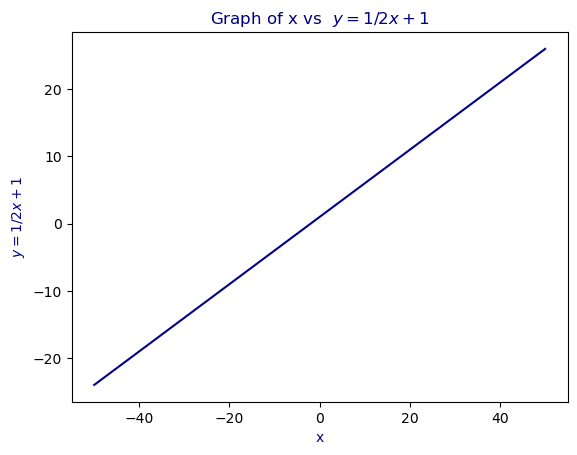

In [30]:
import matplotlib.pyplot as plt


plt.title("Graph of x vs  $y=1/2x + 1$", c="navy")
plt.xlabel("x", c="navy")
plt.ylabel("$y = 1/2x + 1$", c="darkblue")
plt.plot(combined_array[:,0], combined_array[:,1], c="darkblue")
plt.show()

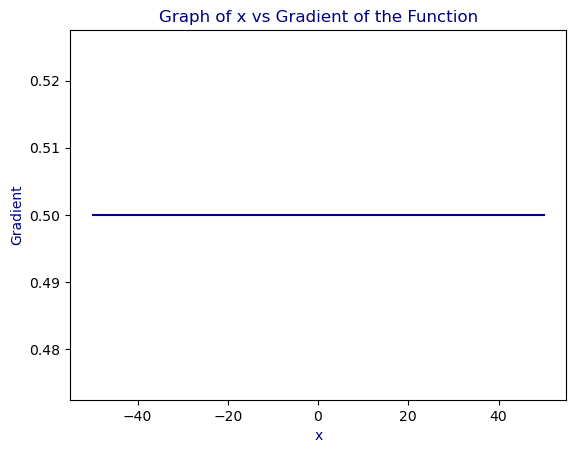

In [31]:
plt.title("Graph of x vs Gradient of the Function", c="navy")
plt.xlabel("x", c="navy")
plt.ylabel("Gradient", c="darkblue")
plt.plot(x_values[1:], gradient, c="darkblue")
plt.show()

## Problem Five: Python functionalization

In [32]:
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    """
    Calculate the gradient using the amount of change.

    Parameters
    ----------------
    function : function
      The function you want to find, the one that returns the ndarray of y when you put the ndarray of x.
    x_range : tuple
      Specify the range in the same way as the argument of np.arange ().

    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
      A combination of x and y. n depends on x_range.
    gradient : ndarray, shape(n-1,)
      Function gradient. One factor is reduced to make a difference
    """
    
    array_x = np.arange(*x_range)
    array_y = function(array_x)
    array_xy = np.concatenate((array_x[:, None], array_y[:, None]), axis=1)
    gradient = (array_xy[1:,1] - array_xy[:-1,1]) / (array_xy[1:,0] - array_xy[:-1,0])
    
    return array_xy, gradient


# creating a function with the equation in problem three for testing purposes
def function0(array_x):
    return (0.5 * array_x) + 1


def function1(array_x):
    array_y = array_x ** 2
    return array_y


def function2(array_x):
    array_y = (2 * array_x ** 2) + 2 ** array_x
    return array_y


def function3(array_x):
    array_y = np.sin(array_x ** 0.5)
    return array_y


# Calling our higher order function and Checking that the output of function0() matches the output in problem 3
array_xy, gradient = compute_gradient(function0, x_range=(-50, 50.1, 0.1))
gradient[:50]

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [33]:
# calculating the gradient using equation 1

array_xy1, gradient1 = compute_gradient(function1, x_range=(-50, 50.1, 0.1))
gradient1[:50]

array([-99.9, -99.7, -99.5, -99.3, -99.1, -98.9, -98.7, -98.5, -98.3,
       -98.1, -97.9, -97.7, -97.5, -97.3, -97.1, -96.9, -96.7, -96.5,
       -96.3, -96.1, -95.9, -95.7, -95.5, -95.3, -95.1, -94.9, -94.7,
       -94.5, -94.3, -94.1, -93.9, -93.7, -93.5, -93.3, -93.1, -92.9,
       -92.7, -92.5, -92.3, -92.1, -91.9, -91.7, -91.5, -91.3, -91.1,
       -90.9, -90.7, -90.5, -90.3, -90.1])

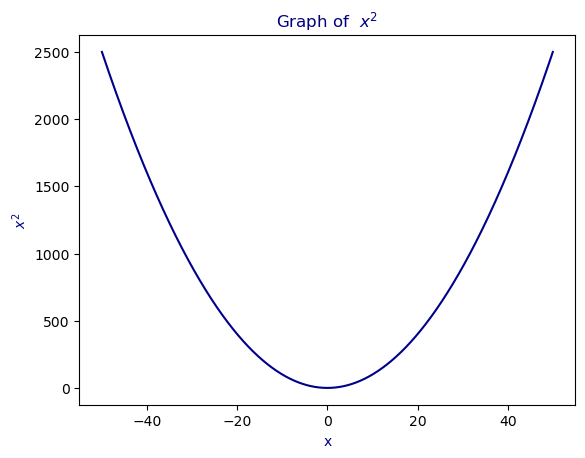

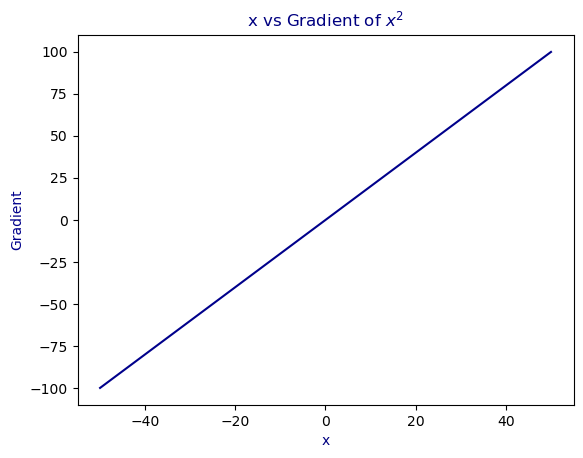

In [103]:

plt.title("Graph of  $x^2$", c="navy")
plt.xlabel("x", c="navy")
plt.ylabel("$x^2$", c="darkblue")
plt.plot(array_xy1[:,0], array_xy1[:,1], c="darkblue")
plt.show()

plt.title("x vs Gradient of $x^2$", c="navy")
plt.xlabel("x", c="navy")
plt.ylabel("Gradient", c="darkblue")
plt.plot(array_xy1[1:,0], gradient1, c="darkblue")
plt.show()

In [35]:
# calculating the gradient using equation 2

array_xy2, gradient2 = compute_gradient(function2, x_range=(-50, 50.1, 0.1))
gradient2[:50]

array([-199.8, -199.4, -199. , -198.6, -198.2, -197.8, -197.4, -197. ,
       -196.6, -196.2, -195.8, -195.4, -195. , -194.6, -194.2, -193.8,
       -193.4, -193. , -192.6, -192.2, -191.8, -191.4, -191. , -190.6,
       -190.2, -189.8, -189.4, -189. , -188.6, -188.2, -187.8, -187.4,
       -187. , -186.6, -186.2, -185.8, -185.4, -185. , -184.6, -184.2,
       -183.8, -183.4, -183. , -182.6, -182.2, -181.8, -181.4, -181. ,
       -180.6, -180.2])

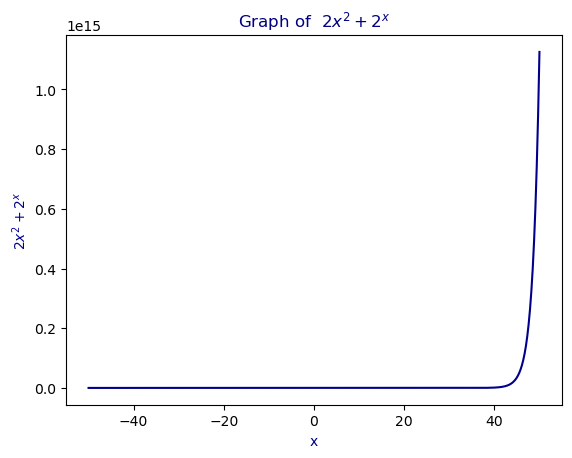

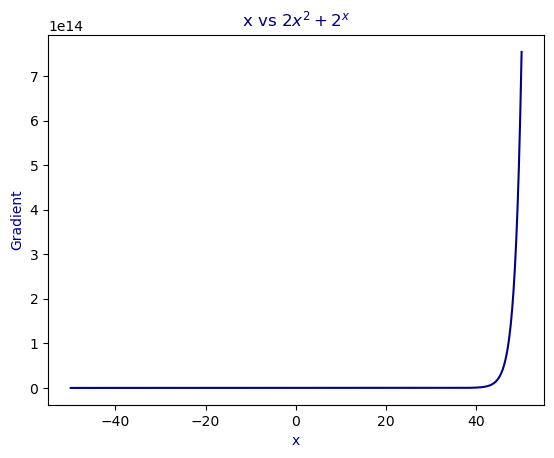

In [105]:

plt.title("Graph of  $2x^2+2^x$", c="navy")
plt.xlabel("x", c="navy")
plt.ylabel("$2x^2+2^x$", c="darkblue")
plt.plot(array_xy2[:,0], array_xy2[:,1], c="darkblue")
plt.show()

plt.title("x vs $2x^2+2^x$", c="navy")
plt.xlabel("x", c="navy")
plt.ylabel("Gradient", c="darkblue")
plt.plot(array_xy2[1:,0], gradient2, c="darkblue")
plt.show()

In [106]:
# calculating the gradient using equation 3

array_xy3, gradient3 = compute_gradient(function3, x_range=(0, 50.1, 0.1))
gradient3[:50]

array([ 3.10983593e+00,  1.21471246e+00,  8.82894606e-01,  7.03828177e-01,
        5.85098219e-01,  4.97909314e-01,  4.29817921e-01,  3.74409878e-01,
        3.27982463e-01,  2.88220882e-01,  2.53589429e-01,  2.23021164e-01,
        1.95746946e-01,  1.71195280e-01,  1.48930670e-01,  1.28614067e-01,
        1.09976607e-01,  9.28016447e-02,  7.69121494e-02,  6.21616541e-02,
        4.84276337e-02,  3.56065709e-02,  2.36102232e-02,  1.23627575e-02,
        1.79852267e-03, -8.13970144e-03, -1.75020966e-02, -2.63329234e-02,
       -3.46714259e-02, -4.25525706e-02, -5.00076542e-02, -5.70648075e-02,
       -6.37494153e-02, -7.00844696e-02, -7.60908669e-02, -8.17876614e-02,
       -8.71922805e-02, -9.23207097e-02, -9.71876518e-02, -1.01806665e-01,
       -1.06190281e-01, -1.10350114e-01, -1.14296943e-01, -1.18040803e-01,
       -1.21591046e-01, -1.24956409e-01, -1.28145068e-01, -1.31164685e-01,
       -1.34022457e-01, -1.36725148e-01])

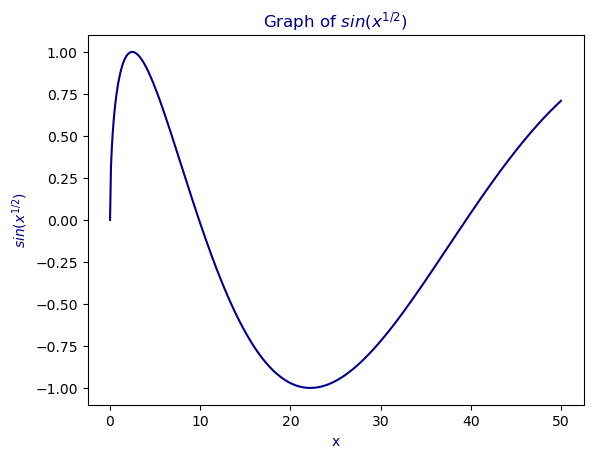

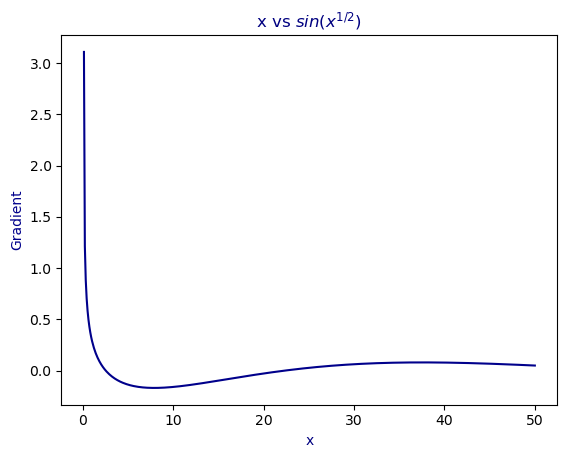

In [107]:

plt.title("Graph of $sin(x^{1/2})$", c="navy")
plt.xlabel("x", c="navy")
plt.ylabel("$sin(x^{1/2})$", c="darkblue")
plt.plot(array_xy3[:,0], array_xy3[:,1], c="darkblue")
plt.show()

plt.title("x vs $sin(x^{1/2})$", c="navy")
plt.xlabel("x", c="navy")
plt.ylabel("Gradient", c="darkblue")
plt.plot(array_xy3[1:,0], gradient3, c="darkblue")
plt.show()

## Problem  Six: Find the minimum value

In [122]:
# displaying the minimum value of y for each of the equations in problem 5
for i in range(1,4):
    array_name = "array_xy"+str(i)
    
    # I used locals() here to get hold of the varible in memory corresponding to the array_name
    min_value = np.min(locals()[array_name][:,1])
    
    print(f"The mininum value of y for function{i} is {min_value}")


The mininum value of y for function1 is 5.048709793414476e-25
The mininum value of y for function2 is 0.9505505632959851
The mininum value of y for function3 is -0.9999997540298113


In [126]:
# For equation y=x^2
print(f"The minimum slope before taking the gradient of the minimum y value is {np.min(gradient1)}")

min_index1 = np.argmin(array_xy1[:,1])

print(f"The slope after taking the gradient of the minimum y value is {gradient1[min_index1]}")

The minimum slope before taking the gradient of the minimum y value is -99.90000000000094
The slope after taking the gradient of the minimum y value is 0.1000000000014225


In [127]:
# For equation y=2x^2+2^x
print(f"The minimum slope before taking the gradient of the minimum y value is {np.min(gradient2)}")

min_index2 = np.argmin(array_xy2[:,1])

print(f"The slope after taking the gradient of the minimum y value is {gradient2[min_index2]}")

The minimum slope before taking the gradient of the minimum y value is -199.8000000000019
The slope after taking the gradient of the minimum y value is 0.024824282409972788


In [128]:
# For equation y=sin(x^(1/2)
print(f"The minimum slope before taking the gradient of the minimum y value is {np.min(gradient3)}")

min_index3 = np.argmin(array_xy3[:,1])

print(f"The slope after taking the gradient of the minimum y value is {gradient3[min_index3]}")

The minimum slope before taking the gradient of the minimum y value is -0.16825101267772707
The slope after taking the gradient of the minimum y value is 0.0004874477930660974
